<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


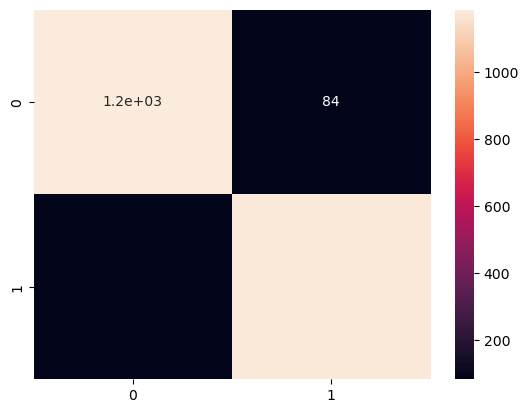

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93      1270
        REAL       0.93      0.93      0.93      1264

    accuracy                           0.93      2534
   macro avg       0.93      0.93      0.93      2534
weighted avg       0.93      0.93      0.93      2534



In [3]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
news_data= pd.read_csv("news.csv")
news_data.head(10)
news_data.info()
news_data.shape
news_data["label"].value_counts()
labels= news_data.label
labels.head(10)
x_train, x_test, y_train, y_test= train_test_split(news_data["text"], labels, test_size= 0.4, random_state= 7)
vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=vectorizer.fit_transform(x_train) 
tfidf_test=vectorizer.transform(x_test)
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(tfidf_train,y_train)
y_pred=passive.predict(tfidf_test)
matrix= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
matrix
sns.heatmap(matrix, annot=True)
plt.show()
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100
Report= classification_report(y_test, y_pred)
print(Report)